In [15]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import matplotlib.dates as mdates
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
raw_data = pd.read_csv('./raw_data.csv')

data = raw_data.copy()
var_list = data.columns[2:]
for var in var_list:
    data.loc[:, var] = data.loc[:, var].str.strip("%").astype(float)

data.loc[:, 'observation_date'] = pd.to_datetime(data.loc[:, 'observation_date'], format="%Y-%m-%d")

In [3]:
data.to_csv('./processed_data.csv', index=False)

In [4]:
data = data.set_index('observation_date')

In [5]:
data.head(10)

,CPIAUCNS,GS10,GS5,GS30,GS2,GS1M,GS20,GS3M,GS3,FII5,GS7,FII30,GS1,GS5-FII5
observation_date,,,,,,,,,,,,,,
1953-04-01,26.6,2.83,2.62,NaN,NaN,NaN,3.08,NaN,2.51,NaN,NaN,NaN,2.36,NaN
1953-05-01,26.7,3.05,2.87,NaN,NaN,NaN,3.18,NaN,2.72,NaN,NaN,NaN,2.48,NaN
1953-06-01,26.8,3.11,2.94,NaN,NaN,NaN,3.21,NaN,2.74,NaN,NaN,NaN,2.45,NaN
1953-07-01,26.8,2.93,2.75,NaN,NaN,NaN,3.12,NaN,2.62,NaN,NaN,NaN,2.38,NaN
1953-08-01,26.9,2.95,2.80,NaN,NaN,NaN,3.10,NaN,2.58,NaN,NaN,NaN,2.28,NaN
1953-09-01,26.9,2.87,2.71,NaN,NaN,NaN,3.07,NaN,2.56,NaN,NaN,NaN,2.20,NaN
1953-10-01,27.0,2.66,2.43,NaN,NaN,NaN,2.95,NaN,2.23,NaN,NaN,NaN,1.79,NaN
1953-11-01,26.9,2.68,2.42,NaN,NaN,NaN,2.95,NaN,2.20,NaN,NaN,NaN,1.67,NaN
1953-12-01,26.9,2.59,2.32,NaN,NaN,NaN,2.89,NaN,2.07,NaN,NaN,NaN,1.66,NaN


In [6]:
var_list

Index(['GS10', 'GS5', 'GS30', 'GS2', 'GS1M', 'GS20', 'GS3M', 'GS3', 'FII5',
       'GS7', 'FII30', 'GS1', 'GS5-FII5'],
      dtype='object')

In [7]:
len(var_list)

13

In [8]:
print('   Total - %d Rows' % (len(data)))
for i, var in enumerate(var_list):
    num_nan = len(data[data[var].isnull()])
    print('%8s - %3d missing' % (var, num_nan))

   Total - 775 Rows
    GS10 -   0 missing
     GS5 -   0 missing
    GS30 - 333 missing
     GS2 - 278 missing
    GS1M - 579 missing
    GS20 -  81 missing
    GS3M - 345 missing
     GS3 -   0 missing
    FII5 - 597 missing
     GS7 - 195 missing
   FII30 - 682 missing
     GS1 -   0 missing
GS5-FII5 - 597 missing


In [72]:
cut_off_year =  486
print('   Total - %d Rows' % (len(data[cut_off_year:])))
for i, var in enumerate(var_list):
    num_nan = len(data[cut_off_year:][data[cut_off_year:][var].isnull()])
    print('%8s - %3d missing' % (var, num_nan))

   Total - 289 Rows
    GS10 -   0 missing
     GS5 -   0 missing
    GS30 -  47 missing
     GS2 -   0 missing
    GS1M -  93 missing
    GS20 -   0 missing
    GS3M -   0 missing
     GS3 -   0 missing
    FII5 - 111 missing
     GS7 -   0 missing
   FII30 - 196 missing
     GS1 -   0 missing
GS5-FII5 - 111 missing


In [73]:
notnull_vars = ['GS10', 'GS5', 'GS3', 'GS1']
notnull_vars2 = ['GS10', 'GS5', 'GS2', 'GS20', 'GS3', 'GS7', 'GS1']

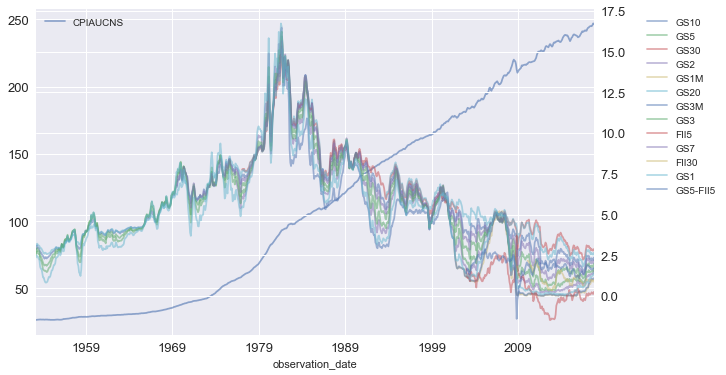

In [9]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

data.iloc[:, 0].plot(ax=ax1, alpha=0.6)
data.iloc[:, 1:].plot(ax=ax2, alpha=0.5)
ax1.legend()
ax2.legend(bbox_to_anchor=(1.08, 1), loc='upper left', ncol=1)
for tick in ax1.get_xticklabels():
    tick.set_fontsize(13)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(13)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(13) 

In [10]:
orignal_cols = ['CPIAUCNS', 'GS10', 'GS5', 'GS30', 'GS2', 'GS1M', 'GS20', 'GS3M', 'GS3', 'FII5',
       'GS7', 'FII30', 'GS1', 'GS5-FII5']

In [11]:
orignal_cols

['CPIAUCNS',
 'GS10',
 'GS5',
 'GS30',
 'GS2',
 'GS1M',
 'GS20',
 'GS3M',
 'GS3',
 'FII5',
 'GS7',
 'FII30',
 'GS1',
 'GS5-FII5']

# Plotting deltas

In [12]:
y = data.iloc[:, 0]
y_delta1 = data.iloc[:, 0] - data.iloc[:, 0].shift(1)

X = data.iloc[:, 1:]

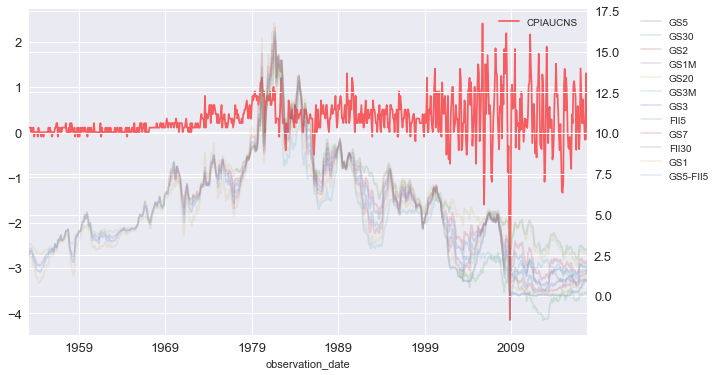

In [13]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

y_delta1.plot(ax=ax1, alpha=0.6, color='r')
X.iloc[:, 1:].plot(ax=ax2, alpha=0.2)
ax1.legend()
ax2.legend(bbox_to_anchor=(1.08, 1), loc='upper left', ncol=1)
for tick in ax1.get_xticklabels():
    tick.set_fontsize(13)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(13)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(13) 

In [20]:
X.shape

(775, 13)

In [19]:
X.dropna().shape

(93, 13)

In [22]:
y_delta1.shape, y_delta1.dropna().shape

((775,), (774,))

In [38]:
notnull_data = pd.concat([y_delta1, X[notnull_vars]], axis=1).dropna()

In [39]:
notnull_data

,CPIAUCNS,GS10,GS5,GS3,GS1
observation_date,,,,,
1953-05-01,0.100,3.05,2.87,2.72,2.48
1953-06-01,0.100,3.11,2.94,2.74,2.45
1953-07-01,0.000,2.93,2.75,2.62,2.38
1953-08-01,0.100,2.95,2.80,2.58,2.28
1953-09-01,0.000,2.87,2.71,2.56,2.20
1953-10-01,0.100,2.66,2.43,2.23,1.79
1953-11-01,-0.100,2.68,2.42,2.20,1.67
1953-12-01,0.000,2.59,2.32,2.07,1.66
1954-01-01,0.000,2.48,2.17,1.89,1.41


In [40]:
scaler = StandardScaler()
notnull_scaled = scaler.fit_transform(notnull_data)

In [41]:
notnull_scaled = pd.DataFrame(notnull_scaled, columns=notnull_data.columns)

In [42]:
notnull_scaled.head()

,CPIAUCNS,GS10,GS5,GS3,GS1
0,-0.378511,-0.994499,-0.889580,-0.819388,-0.730560
1,-0.378511,-0.973396,-0.866486,-0.813066,-0.739654
2,-0.583867,-1.036706,-0.929168,-0.851000,-0.760874
3,-0.378511,-1.029671,-0.912673,-0.863645,-0.791188
4,-0.583867,-1.057809,-0.942364,-0.869967,-0.815439


In [46]:
notnull_scaled.index = notnull_data.index

In [47]:
notnull_scaled

,CPIAUCNS,GS10,GS5,GS3,GS1
observation_date,,,,,
1953-05-01,-0.378511,-0.994499,-0.889580,-0.819388,-0.730560
1953-06-01,-0.378511,-0.973396,-0.866486,-0.813066,-0.739654
1953-07-01,-0.583867,-1.036706,-0.929168,-0.851000,-0.760874
1953-08-01,-0.378511,-1.029671,-0.912673,-0.863645,-0.791188
1953-09-01,-0.583867,-1.057809,-0.942364,-0.869967,-0.815439
1953-10-01,-0.378511,-1.131671,-1.034737,-0.974286,-0.939727
1953-11-01,-0.789224,-1.124637,-1.038036,-0.983769,-0.976103
1953-12-01,-0.583867,-1.156292,-1.071026,-1.024864,-0.979135
1954-01-01,-0.583867,-1.194981,-1.120512,-1.081765,-1.054920


(-5, 5)

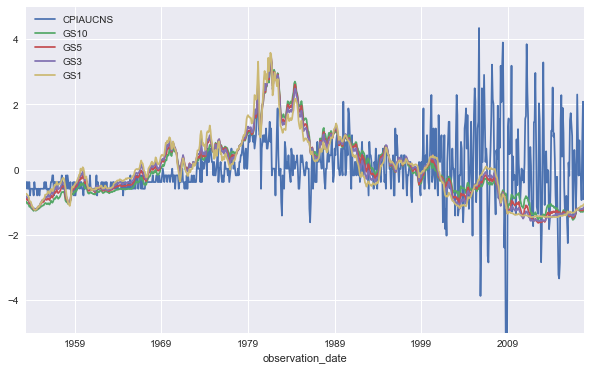

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
notnull_scaled.plot(ax=ax)
ax.set_ylim([-5, 5])

# Plotting deltas - new NotNull_list

In [80]:
notnull_data2 = pd.concat([y_delta1, X[notnull_vars2]], axis=1).dropna()

In [81]:
notnull_data2

,CPIAUCNS,GS10,GS5,GS2,GS20,GS3,GS7,GS1
observation_date,,,,,,,,
1976-06-01,0.005310,7.86,7.61,7.06,8.03,7.31,7.75,6.52
1976-07-01,0.005282,7.83,7.49,6.85,8.00,7.12,7.70,6.20
1976-08-01,0.005254,7.77,7.31,6.63,7.91,6.86,7.58,6.00
1976-09-01,0.003484,7.59,7.13,6.42,7.78,6.66,7.41,5.84
1976-10-01,0.005208,7.41,6.75,5.98,7.70,6.24,7.16,5.50
1976-11-01,0.001727,7.29,6.52,5.81,7.64,6.09,6.86,5.29
1976-12-01,0.003448,6.87,6.10,5.38,7.30,5.68,6.37,4.89
1977-01-01,0.005155,7.21,6.58,5.90,7.48,6.22,6.92,5.29
1977-02-01,0.010256,7.39,6.83,6.09,7.64,6.44,7.16,5.47


In [82]:
scaler = StandardScaler()
notnull_scaled2 = scaler.fit_transform(notnull_data2)

In [83]:
notnull_scaled2 = pd.DataFrame(notnull_scaled2, columns=notnull_data2.columns)

In [84]:
notnull_scaled2.head()

,CPIAUCNS,GS10,GS5,GS2,GS20,GS3,GS7,GS1
0,0.614414,0.515454,0.527909,0.474852,0.479282,0.508279,0.516275,0.403126
1,0.607264,0.506617,0.495488,0.422452,0.469800,0.459509,0.502190,0.324446
2,0.600189,0.488943,0.446857,0.367557,0.441355,0.392771,0.468386,0.275272
3,0.149030,0.435920,0.398226,0.315157,0.400269,0.341434,0.420497,0.235932
4,0.588562,0.382898,0.295560,0.205366,0.374985,0.233626,0.350072,0.152335


In [85]:
notnull_scaled2.index = notnull_data2.index

In [86]:
notnull_scaled2

,CPIAUCNS,GS10,GS5,GS2,GS20,GS3,GS7,GS1
observation_date,,,,,,,,
1976-06-01,0.614414,0.515454,0.527909,0.474852,0.479282,0.508279,0.516275,0.403126
1976-07-01,0.607264,0.506617,0.495488,0.422452,0.469800,0.459509,0.502190,0.324446
1976-08-01,0.600189,0.488943,0.446857,0.367557,0.441355,0.392771,0.468386,0.275272
1976-09-01,0.149030,0.435920,0.398226,0.315157,0.400269,0.341434,0.420497,0.235932
1976-10-01,0.588562,0.382898,0.295560,0.205366,0.374985,0.233626,0.350072,0.152335
1976-11-01,-0.298965,0.347549,0.233420,0.162947,0.356021,0.195124,0.265562,0.100702
1976-12-01,0.139840,0.223830,0.119948,0.055651,0.248564,0.089883,0.127530,0.002352
1977-01-01,0.574873,0.323984,0.249631,0.185404,0.305453,0.228493,0.282464,0.100702
1977-02-01,1.875555,0.377006,0.317174,0.232814,0.356021,0.284963,0.350072,0.144959


(-5, 5)

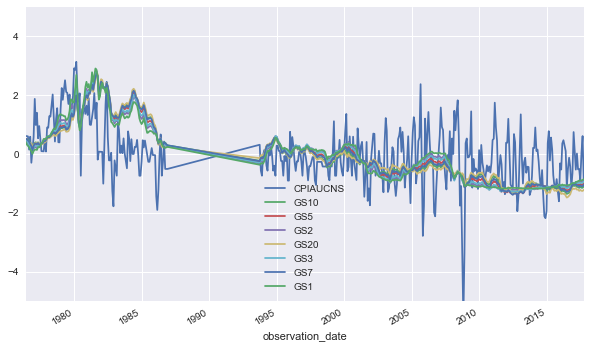

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
notnull_scaled2.plot(ax=ax)
ax.set_ylim([-5, 5])

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA()
Xpca = pca.fit_transform(notnull_scaled2.iloc[:, 1:])

In [101]:
notnull_scaled2.iloc[:, 1:].columns

Index(['GS10', 'GS5', 'GS2', 'GS20', 'GS3', 'GS7', 'GS1'], dtype='object')

In [93]:
notnull_scaled2_pca = pd.DataFrame(Xpca, index = notnull_scaled2.index)

In [94]:
notnull_scaled2

,0,1,2,3,4,5,6
observation_date,,,,,,,
1976-06-01,1.295027,-0.063915,-0.074220,-0.010580,0.009589,-0.008326,-0.003327
1976-07-01,1.202655,-0.127015,-0.083350,-0.017130,0.013327,0.000332,-0.004973
1976-08-01,1.089469,-0.158287,-0.066139,-0.035465,0.016696,0.008115,-0.009610
1976-09-01,0.963290,-0.157380,-0.056828,-0.033056,0.008365,0.006910,-0.008493
1976-10-01,0.754254,-0.216002,-0.008590,-0.035104,0.005661,0.014047,0.001190
1976-11-01,0.628086,-0.226133,0.014595,-0.009649,0.036703,-0.005706,0.001254
1976-12-01,0.328063,-0.207839,0.025824,0.006857,0.041117,-0.022083,-0.001563
1977-01-01,0.633895,-0.180205,-0.039964,-0.012891,0.030925,0.002224,0.008477
1977-02-01,0.780206,-0.189249,-0.055818,-0.018333,0.019668,0.001751,0.008703


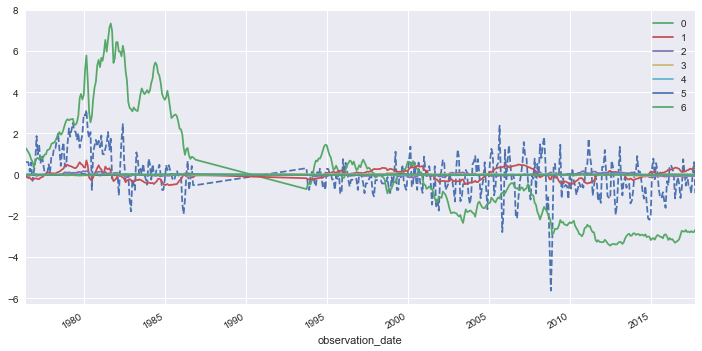

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
notnull_scaled2.iloc[:, 0].plot(ax=ax, ls='--')
notnull_scaled2_pca.plot(ax=ax)

In [104]:
for i in range(7):
    corr = notnull_scaled2.iloc[:, 0].corr(notnull_scaled2_pca.iloc[:, i])
    print('Correlation with Component %d = %.3f' %(i, corr))

Correlation with Component 0 = 0.409
Correlation with Component 1 = 0.173
Correlation with Component 2 = 0.199
Correlation with Component 3 = -0.112
Correlation with Component 4 = -0.047
Correlation with Component 5 = 0.024
Correlation with Component 6 = -0.057


# Plotting deltas (division)

In [49]:
y = data.iloc[:, 0]
y_delta1 = (data.iloc[:, 0]/data.iloc[:, 0].shift(1)) -1

X = data.iloc[:, 1:]

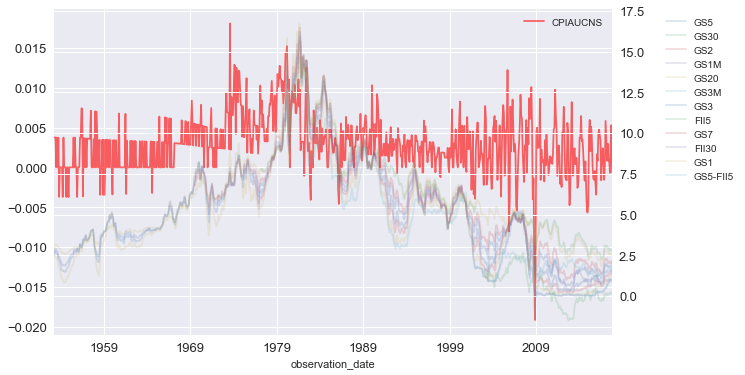

In [50]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

y_delta1.plot(ax=ax1, alpha=0.6, color='r')
X.iloc[:, 1:].plot(ax=ax2, alpha=0.2)
ax1.legend()
ax2.legend(bbox_to_anchor=(1.08, 1), loc='upper left', ncol=1)
for tick in ax1.get_xticklabels():
    tick.set_fontsize(13)
for tick in ax1.get_yticklabels():
    tick.set_fontsize(13)
for tick in ax2.get_yticklabels():
    tick.set_fontsize(13) 

In [51]:
X.shape

(775, 13)

In [52]:
X.dropna().shape

(93, 13)

In [53]:
y_delta1.shape, y_delta1.dropna().shape

((775,), (774,))

In [54]:
notnull_data = pd.concat([y_delta1, X[notnull_vars]], axis=1).dropna()

In [55]:
notnull_data

,CPIAUCNS,GS10,GS5,GS3,GS1
observation_date,,,,,
1953-05-01,0.003759,3.05,2.87,2.72,2.48
1953-06-01,0.003745,3.11,2.94,2.74,2.45
1953-07-01,0.000000,2.93,2.75,2.62,2.38
1953-08-01,0.003731,2.95,2.80,2.58,2.28
1953-09-01,0.000000,2.87,2.71,2.56,2.20
1953-10-01,0.003717,2.66,2.43,2.23,1.79
1953-11-01,-0.003704,2.68,2.42,2.20,1.67
1953-12-01,0.000000,2.59,2.32,2.07,1.66
1954-01-01,0.000000,2.48,2.17,1.89,1.41


In [56]:
scaler = StandardScaler()
notnull_scaled = scaler.fit_transform(notnull_data)

In [57]:
notnull_scaled = pd.DataFrame(notnull_scaled, columns=notnull_data.columns)

In [58]:
notnull_scaled.head()

,CPIAUCNS,GS10,GS5,GS3,GS1
0,0.246167,-0.994499,-0.889580,-0.819388,-0.730560
1,0.242190,-0.973396,-0.866486,-0.813066,-0.739654
2,-0.815603,-1.036706,-0.929168,-0.851000,-0.760874
3,0.238243,-1.029671,-0.912673,-0.863645,-0.791188
4,-0.815603,-1.057809,-0.942364,-0.869967,-0.815439


In [59]:
notnull_scaled.index = notnull_data.index

In [60]:
notnull_scaled

,CPIAUCNS,GS10,GS5,GS3,GS1
observation_date,,,,,
1953-05-01,0.246167,-0.994499,-0.889580,-0.819388,-0.730560
1953-06-01,0.242190,-0.973396,-0.866486,-0.813066,-0.739654
1953-07-01,-0.815603,-1.036706,-0.929168,-0.851000,-0.760874
1953-08-01,0.238243,-1.029671,-0.912673,-0.863645,-0.791188
1953-09-01,-0.815603,-1.057809,-0.942364,-0.869967,-0.815439
1953-10-01,0.234326,-1.131671,-1.034737,-0.974286,-0.939727
1953-11-01,-1.861644,-1.124637,-1.038036,-0.983769,-0.976103
1953-12-01,-0.815603,-1.156292,-1.071026,-1.024864,-0.979135
1954-01-01,-0.815603,-1.194981,-1.120512,-1.081765,-1.054920


(-5, 5)

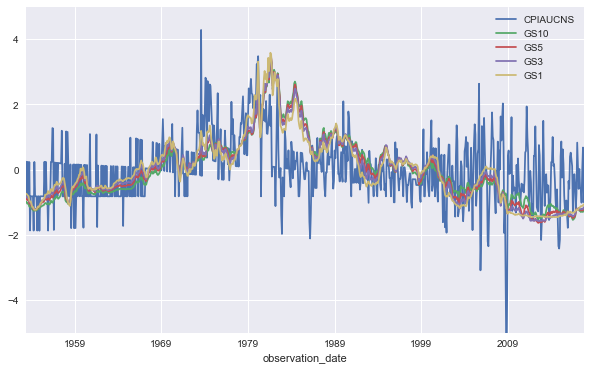

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
notnull_scaled.plot(ax=ax)
ax.set_ylim([-5, 5])

In [ ]:
pca = PCA()

## Pearson Correlation

In [ ]:
delta1_cols = [col for col in data.columns if '_delta1' in col]
delta1s = data[delta1_cols]
delta_corrs = {}

fig = plt.figure(figsize=(16, 16))

for i, col in enumerate(delta1_cols[1:]):
    x = delta1s[col]
    y = delta1s.iloc[:, 0]
    corr = x.corr(y)
    delta_corrs[col] = corr
    
    ax = fig.add_subplot(4, 4, i+1)
    label = col + ('%.3f' % corr)
    ax.scatter(x, y, color='skyblue', alpha=0.3, label=label)
    ax.set_xlabel('delta %s' % col, fontsize=13)
    ax.set_ylabel('delta CPI', fontsize=13)
    ax.legend(fontsize=13)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(13)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(13)
    
plt.tight_layout()

In [ ]:
sns.heatmap(delta1s.corr(), cmap=cm.bwr)

In [ ]:
sns.clustermap(delta1s.corr(), cmap=cm.bwr)

In [ ]:
pd.Series(delta_corrs).to_frame(name='Pearson_Correlation')